In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn.datasets import make_regression

In [3]:
x,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

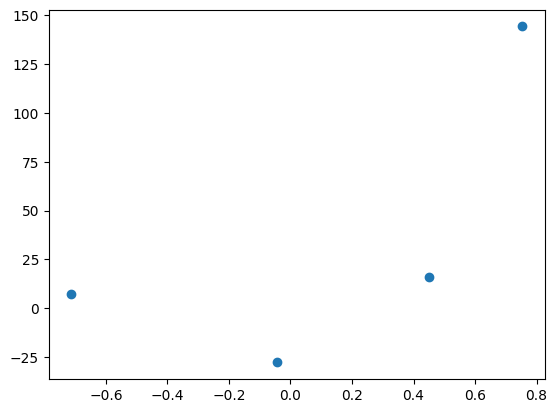

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [5]:
# Let's applly OLS(Ordinary List Square)
from sklearn.linear_model import LinearRegression

In [6]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [7]:
reg.coef_

array([78.35063668])

In [8]:
reg.intercept_

26.15963284313262

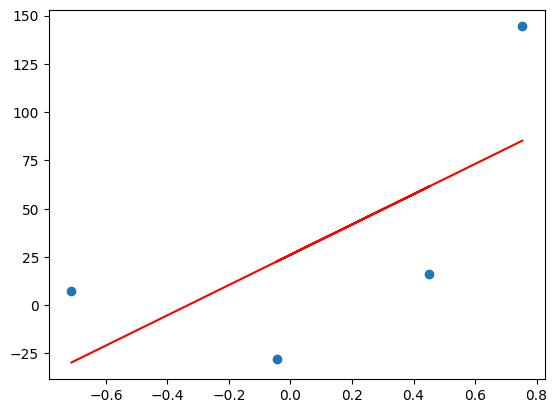

In [9]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red')

In [10]:
reg.predict(x)

array([-29.65662909,  61.55941724,  22.67278832,  85.21770852])

In [11]:
# Let's apply Gradient Descent assuming slop is constant m=78.35
# and let's assume the starting value for intercept b=0
y_pred = ((78.35 * x ) + 100).reshape(4)

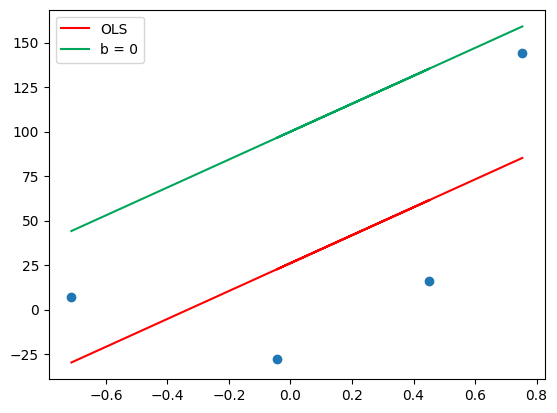

In [12]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLS')
plt.plot(x,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [13]:
m = 78.35
b = 100

In [14]:
loss_slop = -2 * np.sum(y-m*x.ravel() -b)
loss_slop

590.7223659179078

In [15]:
# Let's take learning rate  = 0.1
lr = 0.1

In [16]:
step_size = loss_slop*lr
step_size

59.072236591790784

In [17]:
b = b-step_size  # Here b is b_new
b

40.927763408209216

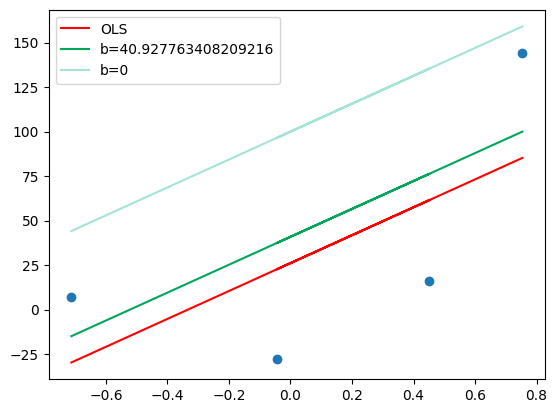

In [18]:
y_pred1 = ((78.35 *x) + b).reshape(4)

plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label="OLS")
plt.plot(x,y_pred1,color='#00a65a',label='b={}'.format(b))
plt.plot(x,y_pred, color='#A3E4D7',label='b=0')
plt.legend()
plt.show()

In [19]:
# Second
loss_size = loss_slop*lr
step_size


59.072236591790784

In [20]:
b = b-step_size
b

-18.144473183581567

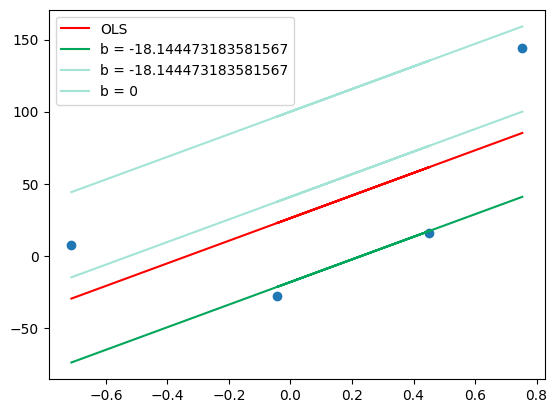

In [21]:


y_pred2 = ((78.35 * x) + b).reshape(4)

plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLS')
plt.plot(x,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(x,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [22]:
# Iteration 3
loss_slope = -2 * np.sum(y - m*x.ravel() - b)
loss_slope

-354.4334195507447

In [23]:


step_size = loss_slope*lr
step_size
     

-35.44334195507447

In [24]:

b = b - step_size
b
     

17.298868771492906

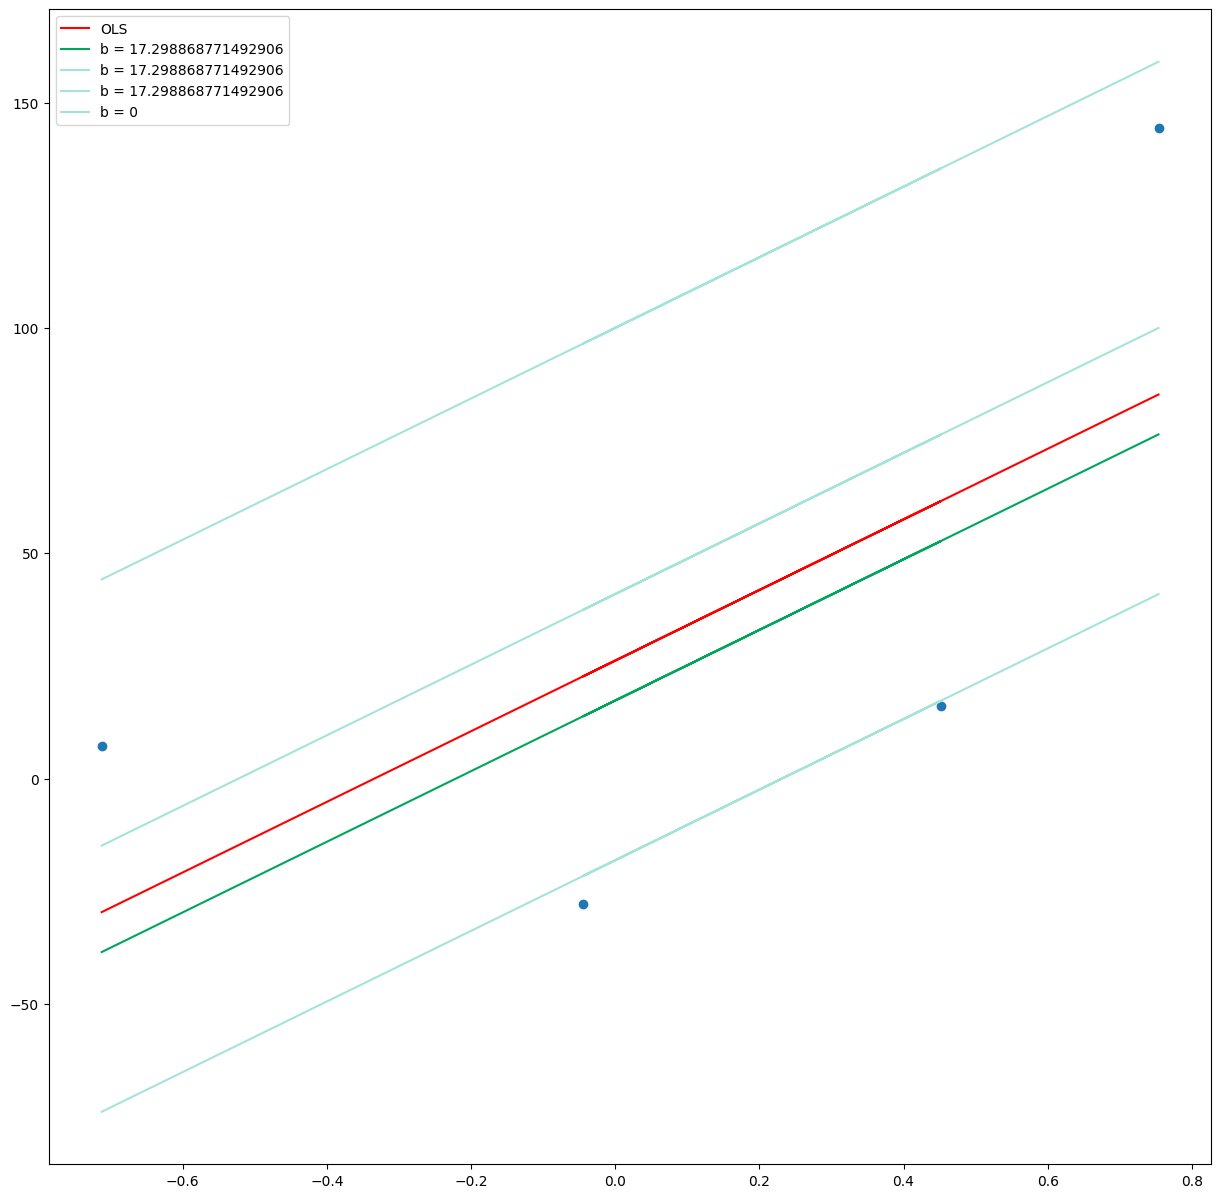

In [25]:
y_pred3 = ((78.35 * x) + b).reshape(4)

plt.figure(figsize=(15,15))
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='OLS')
plt.plot(x,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(x,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(x,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

Let's try with using the loop

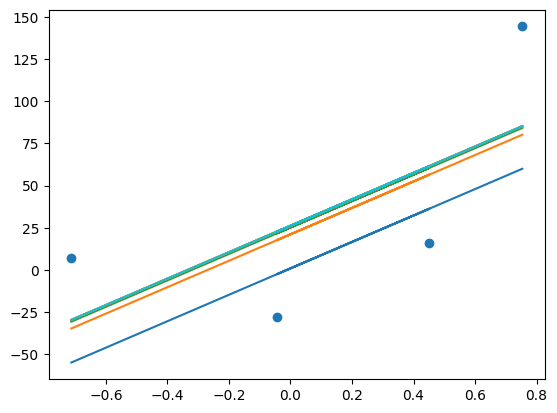

In [26]:
b = -100
m = 78.35
lr = 0.1

epochs = 10
for i in range(epochs):
    loss_slop = -2 * np.sum(y-m*x.ravel() - b)
    b = b - (lr * loss_slop)

    y_pred = m * x + b

    plt.plot(x,y_pred)

plt.scatter(x,y)